## Základný opis dát spolu s ich charakteristikami ##

### Adrian Maslak ###

Import kniznic

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Nacitanie datasetu

In [49]:
patient = pd.read_csv('../069/patient.csv', sep="\t", quotechar='"', engine='python')
station = pd.read_csv('../069/station.csv' , sep="\t")
observation = pd.read_csv('../069/observation.csv', sep="\t")

Basic information

In [50]:


# Funkcia na analýzu štruktúry datasetu
def analyze_structure(df, name):
    print(f"--- Analýza štruktúry pre {name.upper()} ---")
    print(f"Počet záznamov: {df.shape[0]}")
    print(f"Počet atribútov: {df.shape[1]}")
    print("Typy atribútov:")
    display(df.dtypes)
    print("Chýbajúce hodnoty (počet a %):")
    null_counts = df.isnull().sum()
    null_percent = (null_counts / df.shape[0] * 100).round(2)
    display(pd.concat([null_counts, null_percent], axis=1, keys=['Počet null', '% null']))
    
    # Unikátne hodnoty
    print("Unikátne hodnoty v kľúčových stĺpcoch:")
    key_columns = ['user_id', 'station_ID', 'blood_group', 'company'] if name == 'patient' else \
                  ['location', 'station', 'code'] if name == 'station' else []
    for col in key_columns:
        if col in df.columns:
            print(f"{col}: {df[col].nunique()}")
            print(f"Top 5 hodnôt v {col}:")
            display(df[col].value_counts().head())
    
    # Duplikáty
    print(f"Počet duplicitných riadkov: {df.duplicated().sum()}")
    if 'user_id' in df.columns:
        print(f"Počet duplicitných user_id: {df['user_id'].duplicated().sum()}")
        if df['user_id'].duplicated().sum() > 0:
            print("Príklady duplicitných user_id (prvé 5):")
            display(df[df['user_id'].duplicated(keep=False)].sort_values('user_id').head())
    

# Aplikácia na všetky datasety
for df, name in [(patient, 'patient'), (station, 'station'), (observation, 'observation')]:
    analyze_structure(df, name)



--- Analýza štruktúry pre PATIENT ---
Počet záznamov: 2064
Počet atribútov: 13
Typy atribútov:


address              object
job                  object
ssn                  object
name                 object
company              object
blood_group          object
mail                 object
username             object
registration         object
residence           float64
current_location     object
user_id               int64
station_ID            int64
dtype: object

Chýbajúce hodnoty (počet a %):


,Počet null,% null
address,310,15.02
job,1445,70.01
ssn,0,0.00
name,0,0.00
company,0,0.00
blood_group,0,0.00
mail,0,0.00
username,0,0.00
registration,0,0.00
residence,2064,100.00


Unikátne hodnoty v kľúčových stĺpcoch:
user_id: 1308
Top 5 hodnôt v user_id:


user_id
862     6
615     5
1792    5
588     5
1365    5
Name: count, dtype: int64

station_ID: 769
Top 5 hodnôt v station_ID:


station_ID
151    9
227    7
219    7
761    7
810    7
Name: count, dtype: int64

blood_group: 8
Top 5 hodnôt v blood_group:


blood_group
A+     290
A-     270
O+     262
B-     261
AB-    258
Name: count, dtype: int64

company: 1878
Top 5 hodnôt v company:


company
Silva          6
Ditschlerin    5
Novaes         5
Rocha          5
Sá             5
Name: count, dtype: int64

Počet duplicitných riadkov: 0
Počet duplicitných user_id: 756
Príklady duplicitných user_id (prvé 5):


,address,job,ssn,name,company,blood_group,mail,username,registration,residence,current_location,user_id,station_ID
1376,福島県鎌ケ谷市鶴ヶ丘11丁目26番17号 権現堂コーポ403,NaN,879-08-8093,伊藤 拓真,合同会社吉田印刷,AB+,gsuzuki@gmail.com,stanaka,13 Mar 2021,NaN,"(Decimal('-61.7924335'), Decimal('-159.608232'))",2,624
54,"Viela de Costa, 1\nBelmonte\n29141689 Albuquer...",NaN,97063458175,Felipe Abreu,Silva,A-,qpimenta@uol.com.br,iandrade,2021-08-03,NaN,"(Decimal('-53.9864655'), Decimal('-104.715070'))",2,286
841,鳥取県板橋区松石23丁目16番4号,NaN,225-54-3746,佐藤 春香,有限会社佐藤水産,B-,maaya61@yahoo.com,nakajimachiyo,03 Apr 2019,NaN,"(Decimal('-23.353816'), Decimal('173.446933'))",6,818
61,高知県神津島村秋葉原7丁目23番5号,NaN,890-33-3913,小林 直人,株式会社田中通信,AB+,shoheikobayashi@gmail.com,shota04,2023-09-09,NaN,"(Decimal('-65.8688445'), Decimal('152.475141'))",6,36
230,Lagoa Marcelo Garcia\nLorena\n97556491 Novais ...,NaN,20378961403,Maria Vitória da Rocha,Garcia,O+,pcasa-grande@ig.com.br,aragaoana-sophia,19 Apr 2021,NaN,"(Decimal('-64.5701835'), Decimal('-169.724263'))",7,444


--- Analýza štruktúry pre STATION ---
Počet záznamov: 836
Počet atribútov: 6
Typy atribútov:


longitude    float64
revision      object
location      object
station       object
code          object
latitude     float64
dtype: object

Chýbajúce hodnoty (počet a %):


,Počet null,% null
longitude,0,0.00
revision,0,0.00
location,0,0.00
station,0,0.00
code,3,0.36
latitude,0,0.00


Unikátne hodnoty v kľúčových stĺpcoch:
location: 152
Top 5 hodnôt v location:


location
America/New_York       65
Asia/Kolkata           48
America/Chicago        41
Europe/Berlin          38
America/Los_Angeles    34
Name: count, dtype: int64

station: 567
Top 5 hodnôt v station:


station
Yao                 5
San Carlos          5
Tudela              4
Naushahra Virkan    4
Teziutlan           4
Name: count, dtype: int64

code: 111
Top 5 hodnôt v code:


code
US    148
RU     55
IN     48
DE     38
BR     35
Name: count, dtype: int64

Počet duplicitných riadkov: 0
--- Analýza štruktúry pre OBSERVATION ---
Počet záznamov: 12042
Počet atribútov: 23
Typy atribútov:


SpO₂                     float64
HR                       float64
PI                       float64
RR                       float64
EtCO₂                    float64
FiO₂                     float64
PRV                      float64
BP                       float64
Skin Temperature         float64
Motion/Activity index    float64
PVI                      float64
Hb level                 float64
SV                       float64
CO                       float64
Blood Flow Index         float64
PPG waveform features    float64
Signal Quality Index     float64
Respiratory effort       float64
O₂ extraction ratio      float64
SNR                      float64
oximetry                 float64
latitude                 float64
longitude                float64
dtype: object

Chýbajúce hodnoty (počet a %):


,Počet null,% null
SpO₂,0,0.0
HR,0,0.0
PI,0,0.0
RR,0,0.0
EtCO₂,0,0.0
FiO₂,0,0.0
PRV,0,0.0
BP,0,0.0
Skin Temperature,0,0.0
Motion/Activity index,0,0.0


Unikátne hodnoty v kľúčových stĺpcoch:
Počet duplicitných riadkov: 0


# A

## Analyza dat: <br>
Dataset *patient* obsahuje 2064 zaznamov, 15 atributov
__Chybajuce Hodnoty __
- residence: 100%
- job: 70% 
- adress: 15%
- location: 5%

Obsahuje mnoho duplicitnych __user_id__, pomerne chaoticky. Neskor zistime ci je potrebny pre nas ciel
<br>

Dataset *station* obsahuje 836 zaznamov, 6 atributov
- Tento dataset je pomerne upratany, bez duplikatov 

Dataset *observation* obsahuje 12042 zaznamov, 23 atributov
- Nas hlavny dataset pre predikciu _oximetry_. Je bez duplikatov a chybajucich hodnot. Vsetky hodnoty su typu float64





# B   
## Analyza jednotlivych udajov 


Deskriptívne štatistiky pre vybrané atribúty v observation:


,SpO₂,HR,PI,RR,EtCO₂,FiO₂,BP,Skin Temperature,Hb level,oximetry
count,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000,12042.000000
mean,97.641499,80.684540,10.350679,16.017301,39.810951,63.852123,103.601579,35.407801,14.911488,0.595001
std,0.884150,5.154740,3.156649,1.058737,1.361417,9.596359,3.597371,0.935021,0.744052,0.490912
min,95.000000,60.000000,0.200000,12.000000,35.000000,21.000000,90.000000,33.000000,12.000000,0.000000
25%,96.958913,77.261357,7.871266,15.201489,38.893378,57.444116,101.188426,34.619073,14.410483,0.000000
50%,97.704643,80.683144,10.849798,16.031333,39.792951,63.851499,103.585796,35.254164,14.910790,1.000000
75%,98.369842,84.150085,12.805167,16.841962,40.736035,70.180568,106.015339,36.222121,15.416309,1.000000
max,100.000000,100.000000,20.000000,20.000000,45.000000,100.000000,120.000000,38.000000,18.000000,1.000000



Overenie medicínskych rozsahov:
SpO₂: Min=95.00, Max=100.00, Očakávaný rozsah=95-100, Status=OK
HR: Min=60.00, Max=100.00, Očakávaný rozsah=60-100, Status=OK
PI: Min=0.20, Max=20.00, Očakávaný rozsah=0.2-20, Status=OK
RR: Min=12.00, Max=20.00, Očakávaný rozsah=12-20, Status=OK
EtCO₂: Min=35.00, Max=45.00, Očakávaný rozsah=35-45, Status=OK
FiO₂: Min=21.00, Max=100.00, Očakávaný rozsah=21-100, Status=OK
BP: Min=90.00, Max=120.00, Očakávaný rozsah=90-120, Status=OK
Skin Temperature: Min=33.00, Max=38.00, Očakávaný rozsah=33-38, Status=OK
Hb level: Min=12.00, Max=18.00, Očakávaný rozsah=12-18, Status=OK
oximetry: Min=0.00, Max=1.00, Očakávaný rozsah=0-1, Status=OK


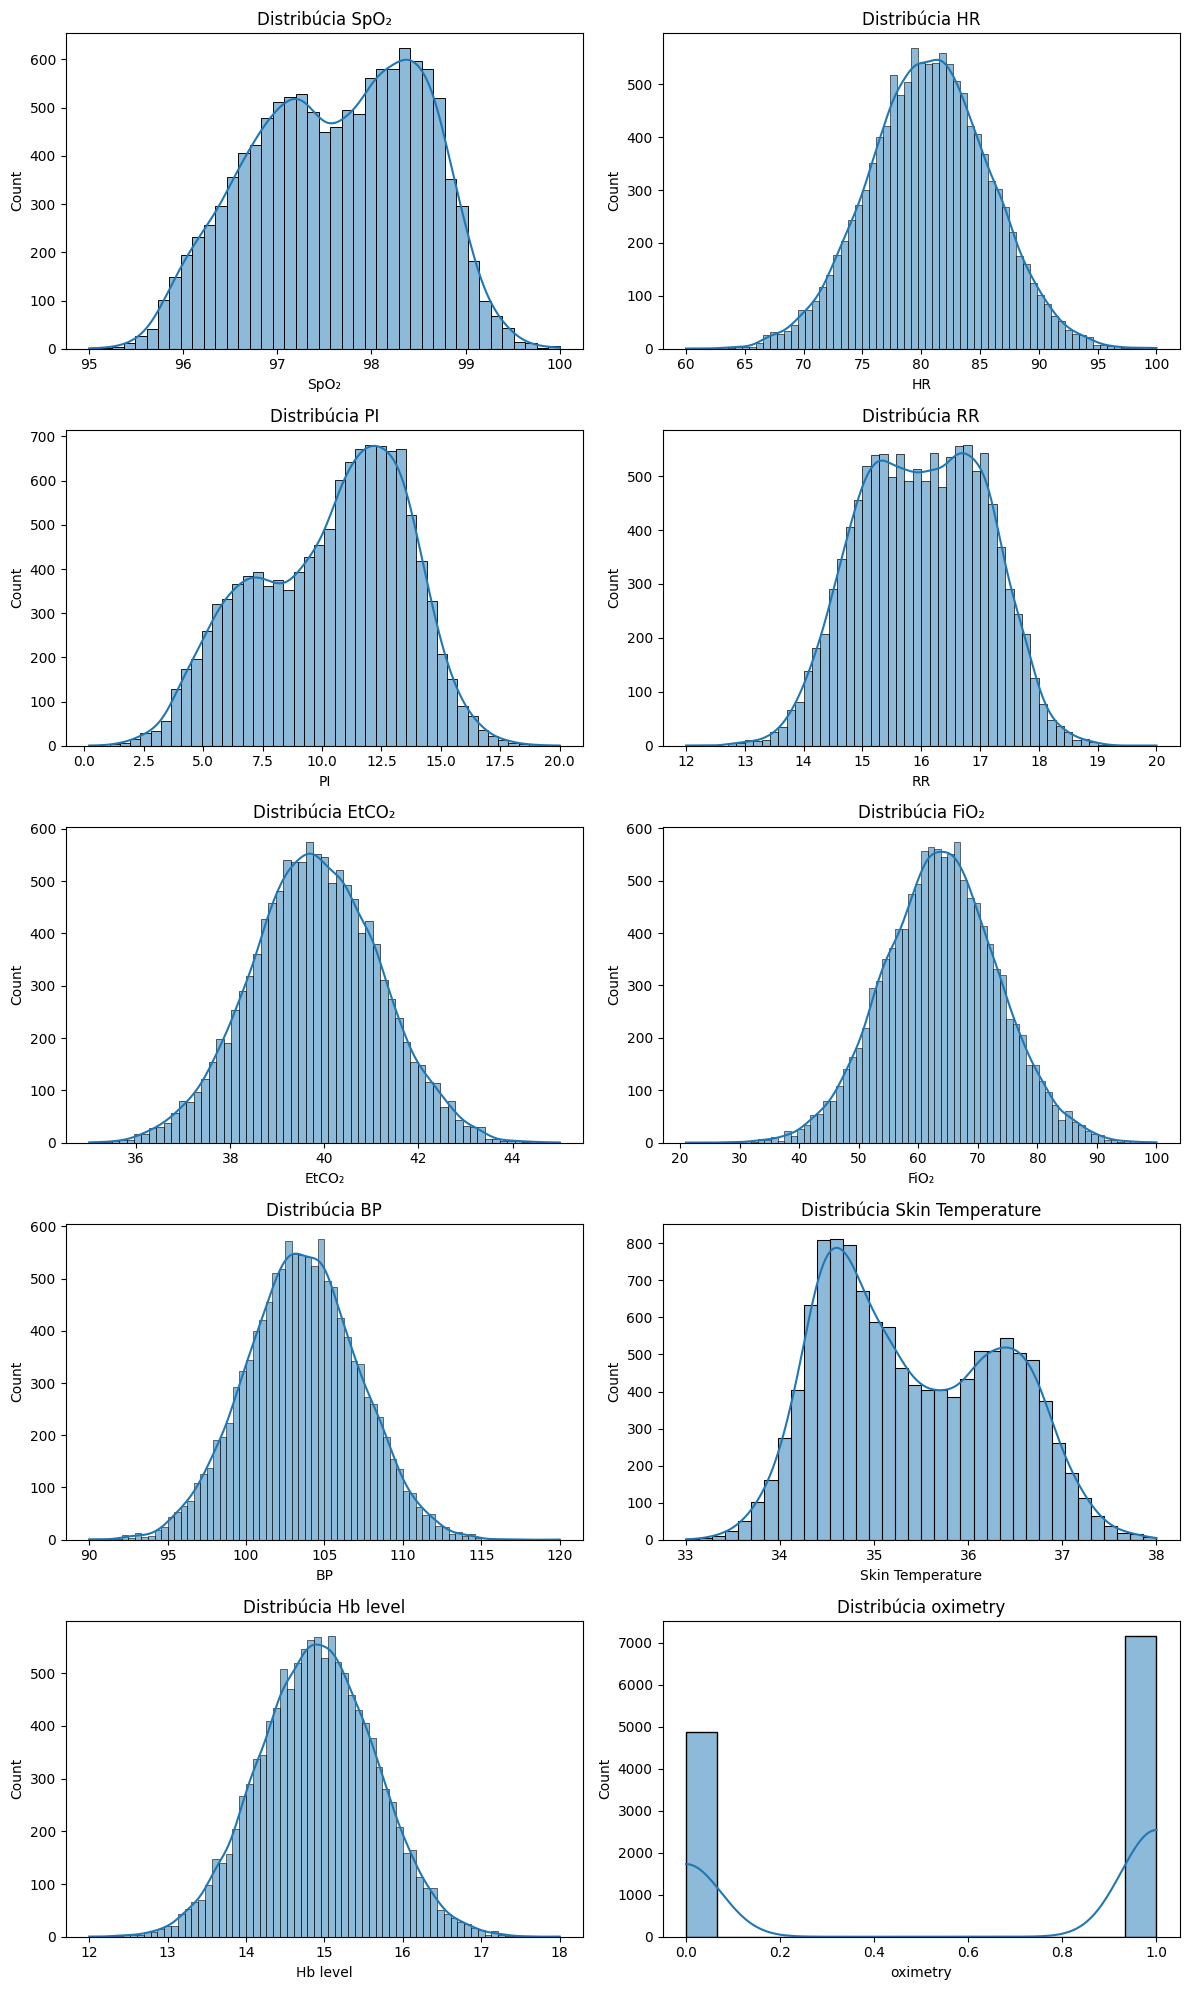

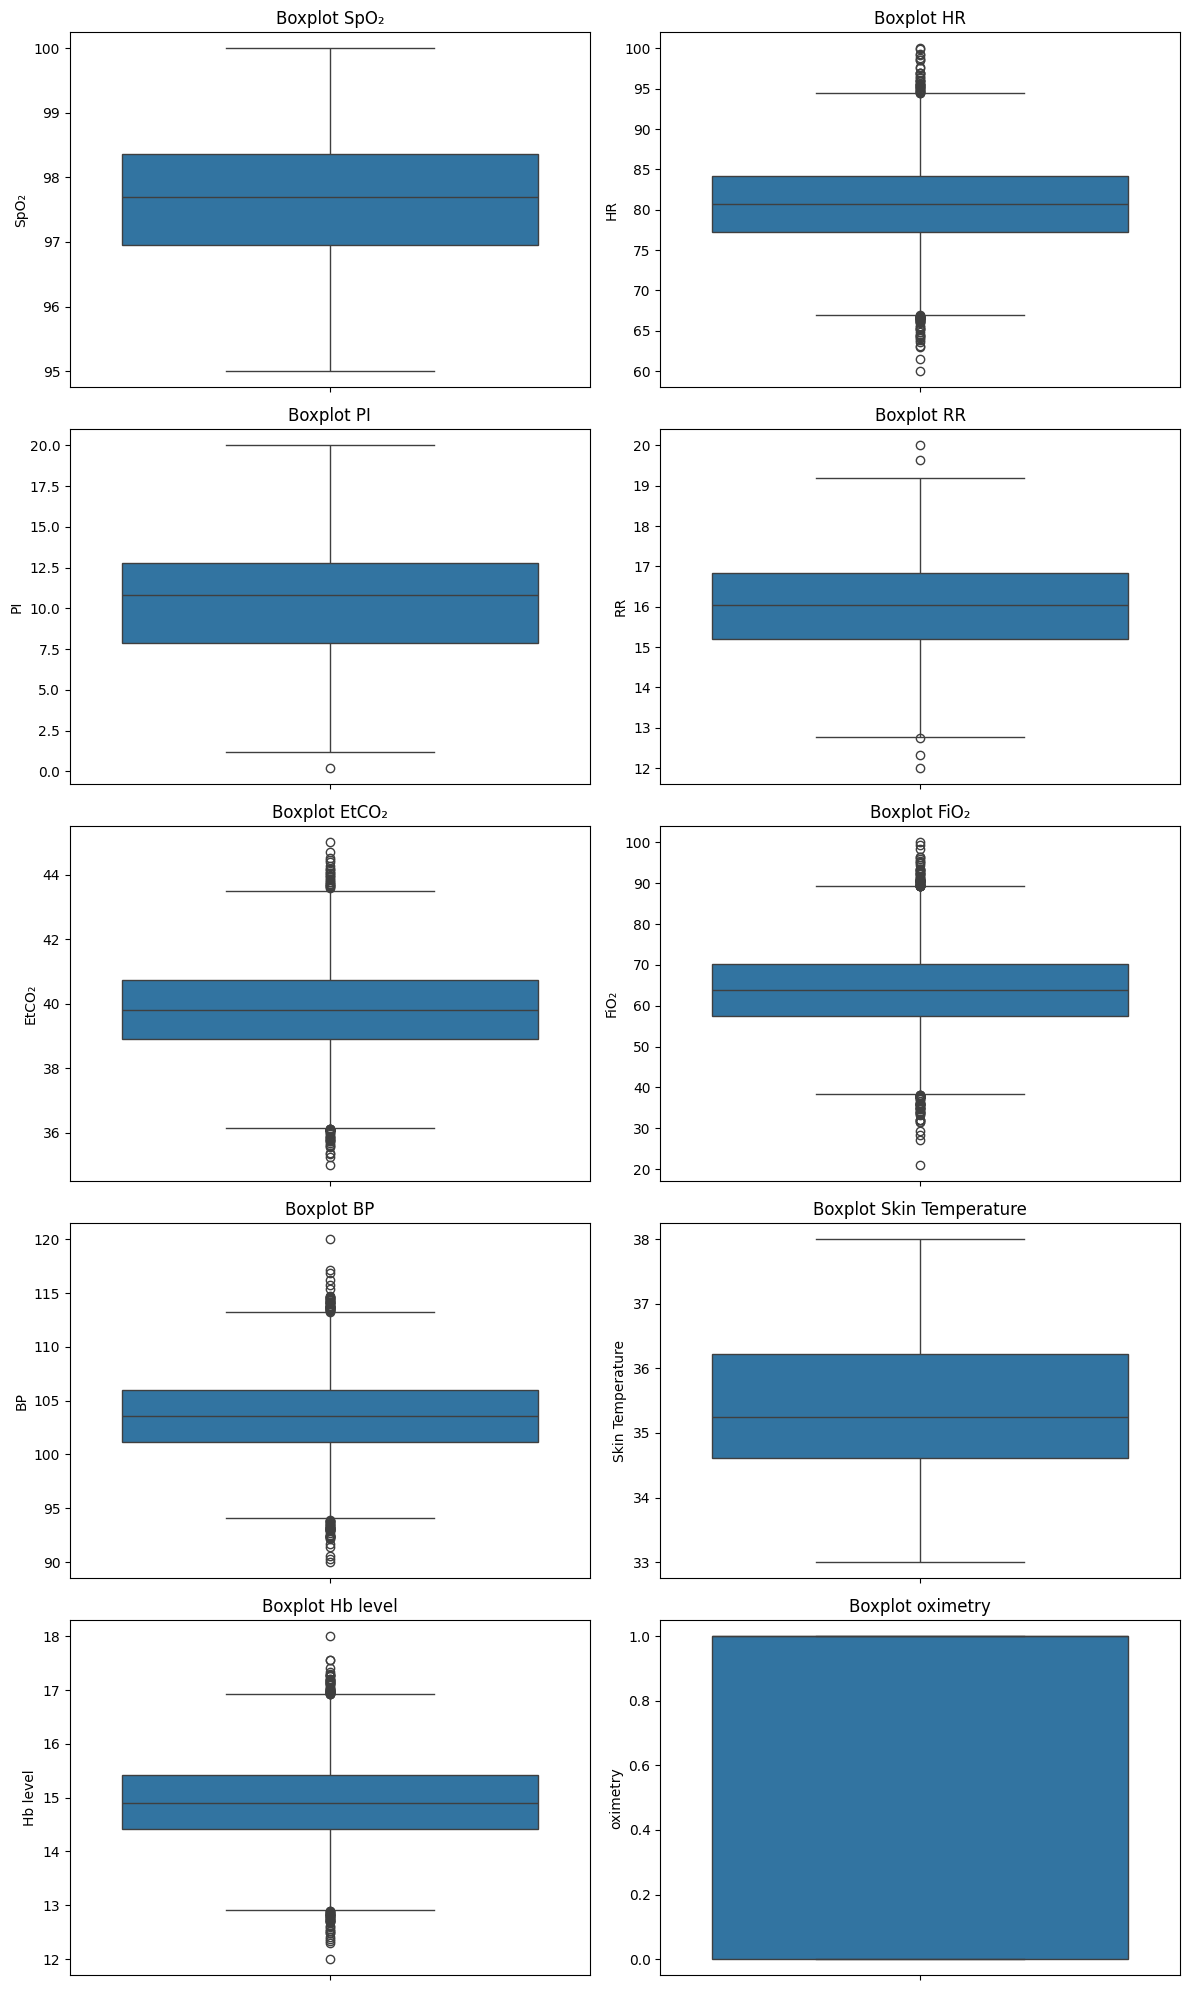


Distribúcia blood_group v patient:


blood_group
A+     0.141
A-     0.131
O+     0.127
B-     0.126
AB-    0.125
O-     0.118
AB+    0.116
B+     0.116
Name: proportion, dtype: float64

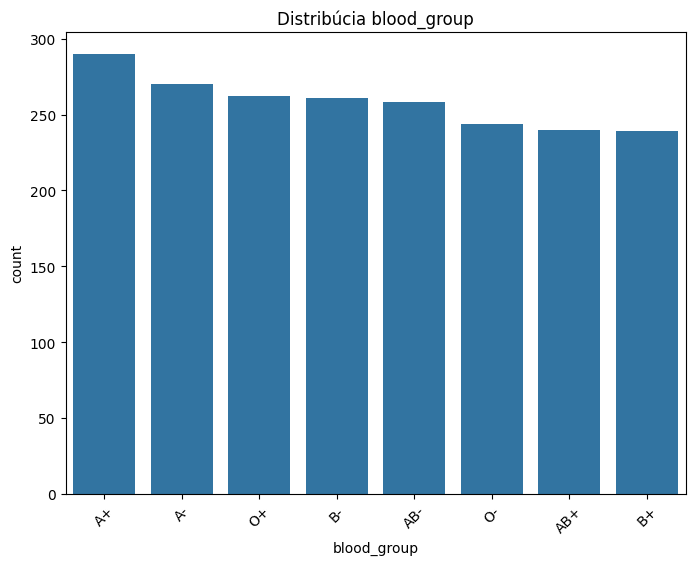

In [51]:

selected_attrs = ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'BP', 'Skin Temperature', 'Hb level', 'oximetry']

# Očakávané medicínske rozsahy
ranges = {
    'SpO₂': (95, 100),
    'HR': (60, 100),
    'PI': (0.2, 20),
    'RR': (12, 20),
    'EtCO₂': (35, 45),
    'FiO₂': (21, 100),
    'BP': (90, 120),
    'Skin Temperature': (33, 38),
    'Hb level': (12, 18),
    'oximetry': (0, 1)
}

# Deskriptívne štatistiky pre observation
print("Deskriptívne štatistiky pre vybrané atribúty v observation:")
display(observation[selected_attrs].describe())

# Overenie rozsahov
print("\nOverenie medicínskych rozsahov:")
for attr in selected_attrs:
    min_val, max_val = observation[attr].min(), observation[attr].max()
    expected_min, expected_max = ranges.get(attr, (None, None))
    status = 'OK' if (expected_min <= min_val <= max_val <= expected_max) else 'Mimo rozsah'
    print(f"{attr}: Min={min_val:.2f}, Max={max_val:.2f}, Očakávaný rozsah={expected_min}-{expected_max}, Status={status}")

# Vizualizácia distribúcií (histogramy s KDE)
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.ravel()
for i, attr in enumerate(selected_attrs):
    sns.histplot(observation[attr], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribúcia {attr}")
plt.tight_layout()
plt.show()

# Boxploty pre numerické atribúty
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.ravel()
for i, attr in enumerate(selected_attrs):
    sns.boxplot(y=observation[attr], ax=axes[i])
    axes[i].set_title(f"Boxplot {attr}")
plt.tight_layout()
plt.show()

# Analýza blood_group z patient
print("\nDistribúcia blood_group v patient:")
display(patient['blood_group'].value_counts(normalize=True).round(3))
plt.figure(figsize=(8, 6))
sns.countplot(x='blood_group', data=patient, order=patient['blood_group'].value_counts().index)
plt.title("Distribúcia blood_group")
plt.xticks(rotation=45)
plt.show()

V deskriptivnej statistike vidime: 
- $SpO_2$ (Saturacia kyslika): Hodnoty vyzeraju normalne. Nemame ziadne hodnoty pod 95 co znaci pozitivne vysledky.
- HR (Srdcovy tep): Priemer je ~80 BPM. Rozsah 60-100 BPM co znaci normalnu distribuciu. Nevidime ziadne extremy
- PI (Perfuzny index): Priemer ~10, znaci zdravu populaciu. Histogram je mierne Left-skewed co znaci ze sa nova krv dostava do koncatim vo vacsom mnostve vo vacsej casti populacie. Rozsah 0.2-20 - normalne hodnoty su 1-20
- RR (dychacia frekvencia): Priemer ~16, normalny rozsah je 12-20 co znaci zdrave hodnoty. Nevidime ziadne extremne hodnoty co by znacilo dychavicnost alebo ine priznaky
- $EtCO_2$ (end-tidal CO2) : priemer 39.81mmHg co je v sulade s priemerom
- $FiO_2$ (Frakcia inspirovaneho kyslika): Priemer ~64% - vyssi priemer naznacuje ze cast pacientov je na kyslikovej liecbe. Hladina kyslika vo vzduchu 0.21, extremne pripady pri terapii 1.00. 
- BP (Systolicky krvny tlak) : priemer ~103 mmHg - normalne hodnoty su 90-120 cize hodnoty su v norme. 
- Skin temperature: Priemer ~35,5 C z mojho hladiska je teplota mierne pod beznou telesnou teplotou. No v pripade zistovanych lekarskych hodnot je normalny rozsah 33-37 C cize tiez v norme
- HB (hemoglobin): Priemer ~15, rozsah je 12-18 co neznaci ziadne znamky anemie alebo polycytemie
- oximetry: Nechapem (Potrebujem konzultovat)


<br>
Krvne skupiny su rovnomerne rozdelene co nam vytvara vhodny kategoricky model 

# C
## Parova analyza

Korelačná matica (úryvok):


,SpO₂,HR,PI,RR,EtCO₂,FiO₂,BP,Skin Temperature,Hb level,oximetry
SpO₂,1.000000,-0.001413,0.338853,0.243635,-0.003755,-0.012514,0.013553,-0.011845,0.014767,0.649222
HR,-0.001413,1.000000,-0.005064,0.003625,-0.007792,0.005573,-0.005534,0.008060,0.001244,-0.004116
PI,0.338853,-0.005064,1.000000,-0.159118,0.003651,0.014456,-0.002244,-0.420690,0.000434,0.353248
RR,0.243635,0.003625,-0.159118,1.000000,0.006715,-0.014449,-0.002082,0.333286,-0.001345,0.282598
EtCO₂,-0.003755,-0.007792,0.003651,0.006715,1.000000,0.000451,-0.008667,-0.000693,0.001797,-0.000773


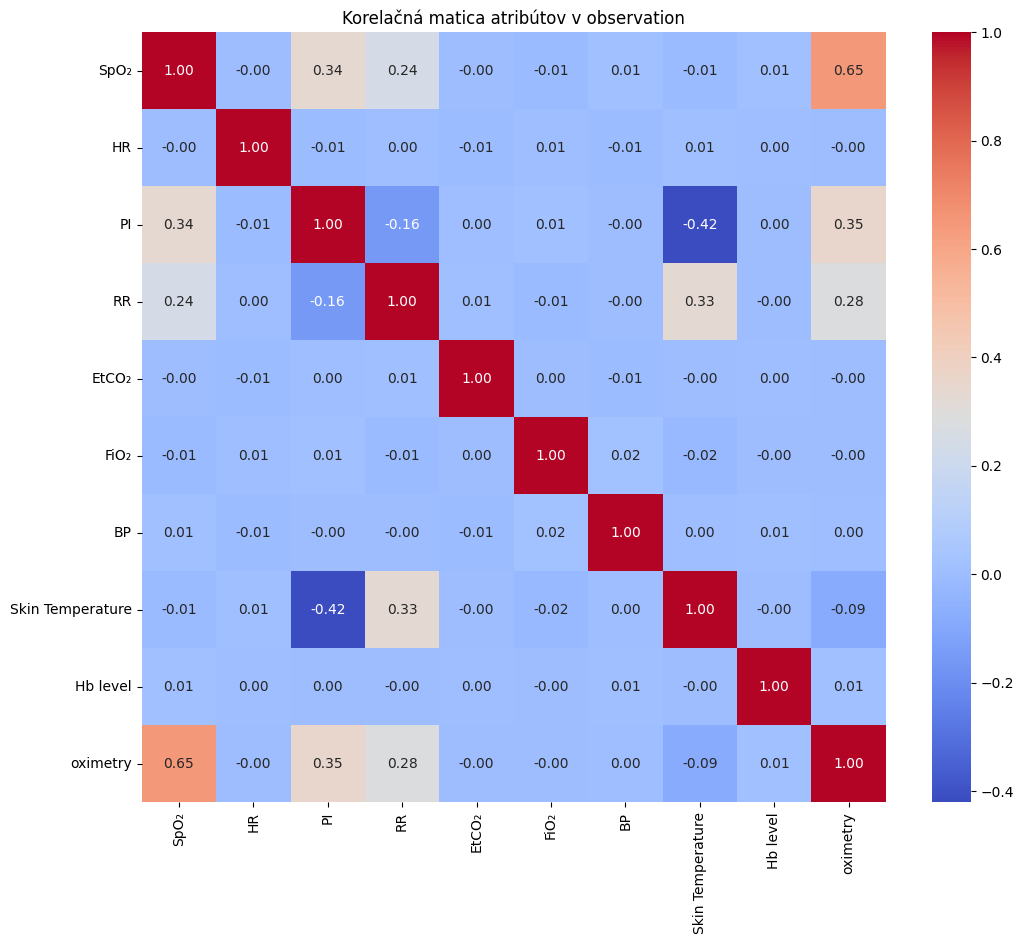


Silné korelácie (|corr| > 0.5):
SpO₂ je silne korelované s: ['oximetry']
oximetry je silne korelované s: ['SpO₂']

Crosstab blood_group vs oximetry (proporcie):


oximetry,0.0,1.0
blood_group,,
A+,0.402,0.598
A-,0.398,0.602
AB+,0.401,0.599
AB-,0.411,0.589
B+,0.404,0.596
B-,0.395,0.605
O+,0.419,0.581
O-,0.395,0.605


<Figure size 1000x600 with 0 Axes>

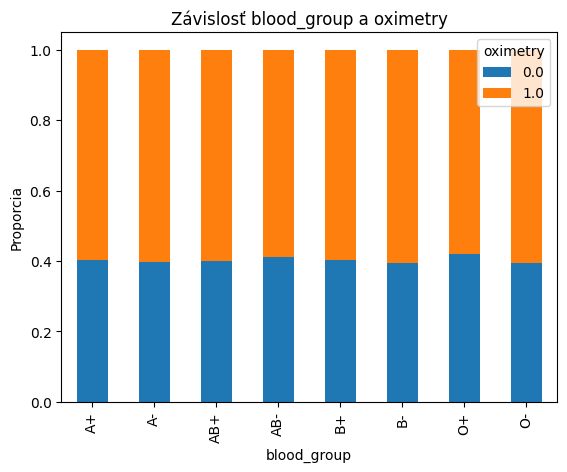

In [52]:

# Vybrané atribúty pre korelácie
selected_attrs = ['SpO₂', 'HR', 'PI', 'RR', 'EtCO₂', 'FiO₂', 'BP', 'Skin Temperature', 'Hb level', 'oximetry']

# Korelačná matica
corr_matrix = observation[selected_attrs].corr(method='pearson')
print("Korelačná matica (úryvok):")
display(corr_matrix.head())

# Vizualizácia heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelačná matica atribútov v observation")
plt.show()

# Identifikácia silných korelácií (|corr| > 0.5)
print("\nSilné korelácie (|corr| > 0.5):")
strong_corrs = (corr_matrix.abs() > 0.5) & (corr_matrix.abs() < 1.0)
for col in strong_corrs.columns:
    correlated = strong_corrs.index[strong_corrs[col]]
    if not correlated.empty:
        print(f"{col} je silne korelované s: {list(correlated)}")



# Crosstab pre blood_group vs oximetry (po spojení)
if 'blood_group' in merged.columns and 'oximetry' in merged.columns:
    crosstab = pd.crosstab(merged['blood_group'], merged['oximetry'], normalize='index').round(3)
    print("\nCrosstab blood_group vs oximetry (proporcie):")
    display(crosstab)
    plt.figure(figsize=(10, 6))
    crosstab.plot(kind='bar', stacked=True)
    plt.title("Závislosť blood_group a oximetry")
    plt.ylabel("Proporcia")
    plt.show()
else:
    print("Spojenie datasetov zlyhalo – overte geo matching.")